In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/cancer_classification.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df['benign_0__mal_1'].isnull().count()

569

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

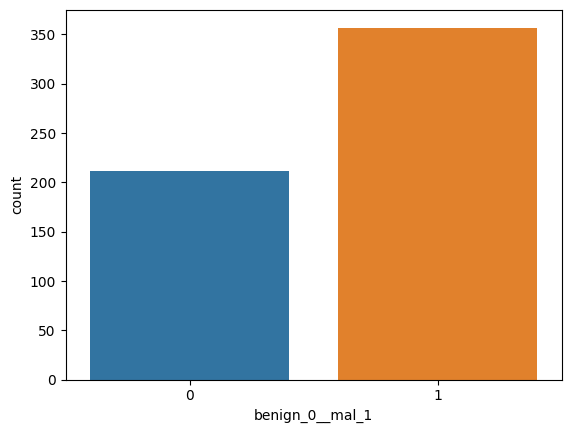

In [ ]:
# check label visualization(mal= 1 benign = 0)
sns.countplot(x='benign_0__mal_1', data = df )

<Axes: >

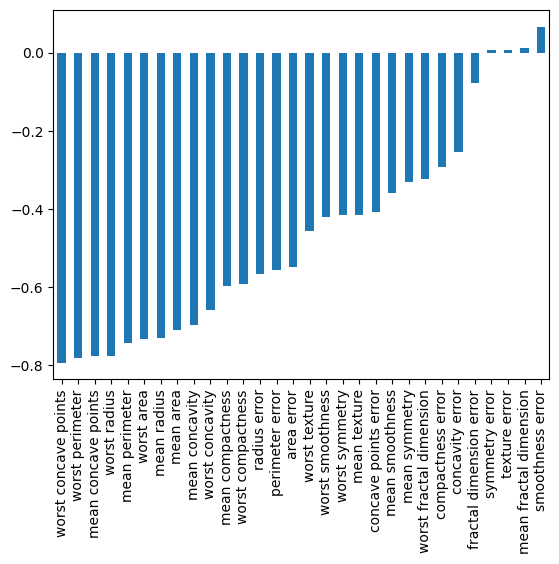

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind= 'bar') # check correlation with respect to label 

<Axes: >

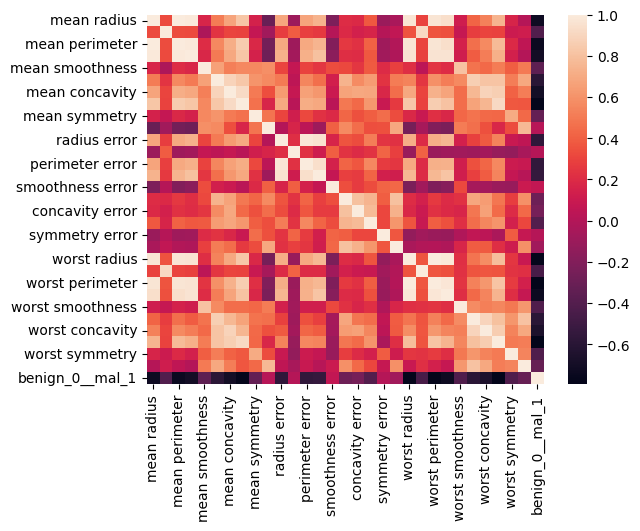

In [ ]:
sns.heatmap(df.corr())

In [14]:
X= df.drop('benign_0__mal_1', axis= 1).values
y = df['benign_0__mal_1'].values

In [15]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
X_test.shape

(143, 30)

In [25]:
X_test

array([[0.23404672, 0.30064254, 0.23595106, ..., 0.34879725, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53834116, ..., 0.61477663, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38255797, ..., 0.52027491, 0.25073921,
        0.21320787],
       ...,
       [0.16401391, 0.24078458, 0.16360791, ..., 0.25536082, 0.28247585,
        0.20150899],
       [0.59351584, 0.42069665, 0.58386684, ..., 0.82061856, 0.23713779,
        0.17895897],
       [0.12581419, 0.08488333, 0.1268317 , ..., 0.23010309, 0.27045141,
        0.18802984]])

In [26]:
model = Sequential()
model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid')) #Binary classification

model.compile(optimizer ='adam', loss = 'binary_crossentropy')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose =1 , patience = 25)

In [29]:
model.fit(x= X_train, y= y_train,
          validation_data =(X_test,y_test),
          batch_size =128, epochs = 600,
          callbacks= [early_stop])

Epoch 1/600
4/4 [==============================] - 2s 86ms/step - loss: 0.7053 - val_loss: 0.6955
Epoch 2/600
4/4 [==============================] - 0s 20ms/step - loss: 0.6923 - val_loss: 0.6813
Epoch 3/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6800 - val_loss: 0.6668
Epoch 4/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6672 - val_loss: 0.6524
Epoch 5/600
4/4 [==============================] - 0s 21ms/step - loss: 0.6550 - val_loss: 0.6380
Epoch 6/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6428 - val_loss: 0.6238
Epoch 7/600
4/4 [==============================] - 0s 15ms/step - loss: 0.6303 - val_loss: 0.6092
Epoch 8/600
4/4 [==============================] - 0s 20ms/step - loss: 0.6176 - val_loss: 0.5946
Epoch 9/600
4/4 [==============================] - 0s 19ms/step - loss: 0.6047 - val_loss: 0.5796
Epoch 10/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5915 - val_loss: 0.5644
Epoch 11/600
4/4 [=

In [30]:
losses = pd.DataFrame(model.history.history)

<Axes: >

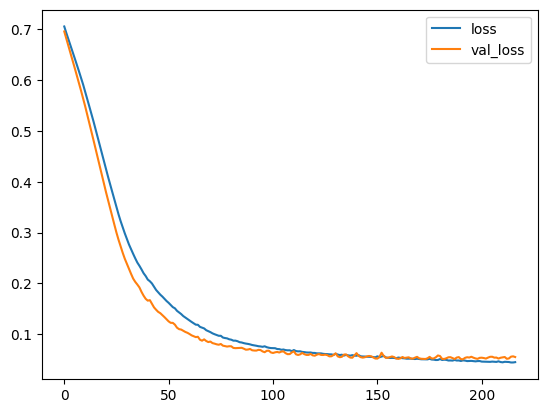

In [31]:
losses.plot()

Example of model overfitting

In [32]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) #Binary classification

model.compile(optimizer ='adam', loss = 'binary_crossentropy')

In [33]:
model.fit(x= X_train, y= y_train,
          validation_data =(X_test,y_test),
          batch_size =128, epochs = 600,
          callbacks= [early_stop])

Epoch 1/600
4/4 [==============================] - 1s 92ms/step - loss: 0.6911 - val_loss: 0.6764
Epoch 2/600
4/4 [==============================] - 0s 28ms/step - loss: 0.6848 - val_loss: 0.6683
Epoch 3/600
4/4 [==============================] - 0s 26ms/step - loss: 0.6831 - val_loss: 0.6597
Epoch 4/600
4/4 [==============================] - 0s 24ms/step - loss: 0.6800 - val_loss: 0.6511
Epoch 5/600
4/4 [==============================] - 0s 24ms/step - loss: 0.6725 - val_loss: 0.6428
Epoch 6/600
4/4 [==============================] - 0s 24ms/step - loss: 0.6493 - val_loss: 0.6343
Epoch 7/600
4/4 [==============================] - 0s 27ms/step - loss: 0.6620 - val_loss: 0.6249
Epoch 8/600
4/4 [==============================] - 0s 23ms/step - loss: 0.6455 - val_loss: 0.6150
Epoch 9/600
4/4 [==============================] - 0s 23ms/step - loss: 0.6395 - val_loss: 0.6046
Epoch 10/600
4/4 [==============================] - 0s 23ms/step - loss: 0.6176 - val_loss: 0.5919
Epoch 11/600
4/4 [=

In [34]:
losses = pd.DataFrame(model.history.history)

<Axes: >

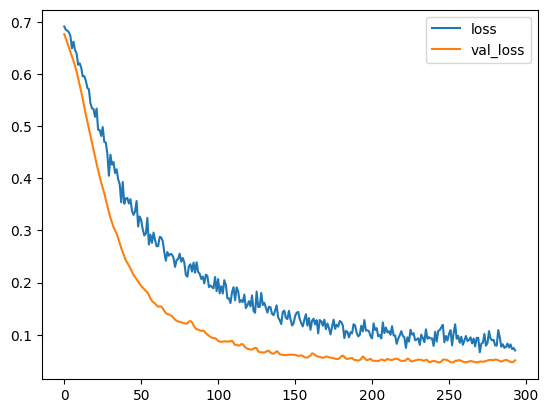

In [35]:
losses.plot()

In [55]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [56]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [58]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 2 87]]


98% accuracy